# Generating Plots

In [2]:
#importing libraries and dependencies

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from math import pi


In [27]:
#importing data

df = pd.read_csv("FIFA_World_Cup_Tidy.csv") 

In [28]:
df.head()

,season,team,players_used,age,possession,matches_played,starts,minutes,90s_played,goals,...,expected_goals,non_penalty_xG,progressive_carries,progressive_passes,goals_per_90,goals_minus_penalty_per_90,xG_per_90,non_penalty_xG_per_90,world_cup_winner,continent
0,1930,Argentina,21.0,24.3,NaN,5,55,450,5.0,18,...,18.00,NaN,NaN,NaN,3.60,3.60,0.200000,NaN,0,Americas
1,1934,Argentina,11.0,23.9,NaN,1,11,90,1.0,2,...,2.00,NaN,NaN,NaN,2.00,2.00,0.022222,NaN,0,Americas
2,1958,Argentina,14.0,28.3,NaN,3,33,270,3.0,5,...,5.01,NaN,NaN,NaN,1.67,1.00,0.055667,NaN,0,Americas
3,1962,Argentina,19.0,25.5,NaN,3,33,270,3.0,2,...,2.01,NaN,NaN,NaN,0.67,0.67,0.022333,NaN,0,Americas
4,1966,Argentina,12.0,26.1,NaN,4,44,360,4.0,4,...,4.00,NaN,NaN,NaN,1.00,1.00,0.044444,NaN,0,Americas


# Countries with most wins

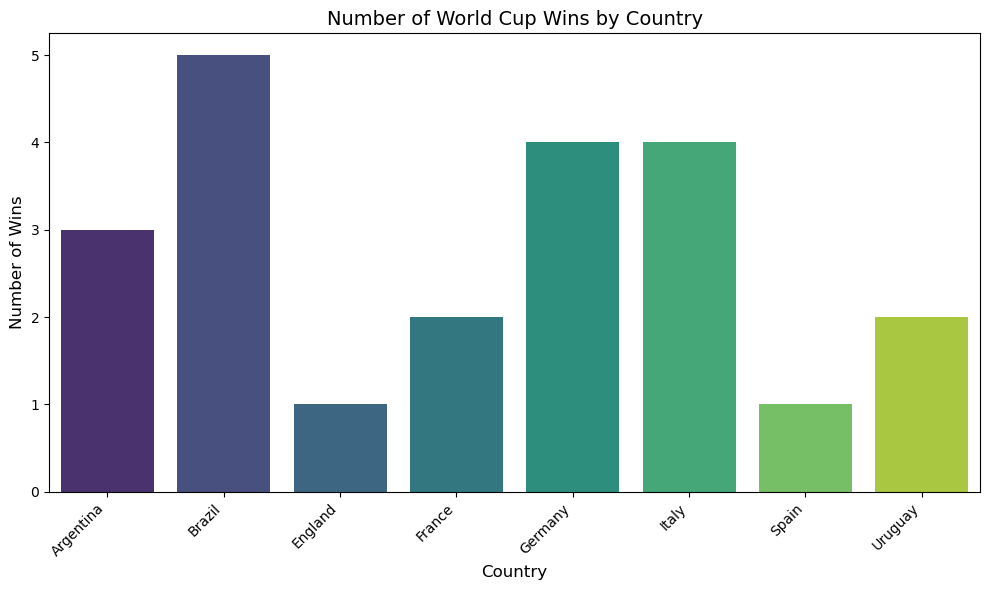

In [30]:
country_and_wins = df.groupby('team')['world_cup_winner'].sum().reset_index()
country_and_wins = country_and_wins.rename(columns={'world_cup_winner': 'wins'})
country_and_wins = country_and_wins[country_and_wins['wins'] > 0]

country_and_wins.sort_values(by = 'wins', ascending= False)

plt.figure(figsize=(10, 6))
sns.barplot(data=country_and_wins, x='team', y='wins', palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Number of World Cup Wins by Country', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Winner Heatmap

In [31]:
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
merged = world.set_index('ADMIN').join(country_and_wins.set_index('team'))
merged.head()
merged['wins'] = merged['wins'].fillna(0)

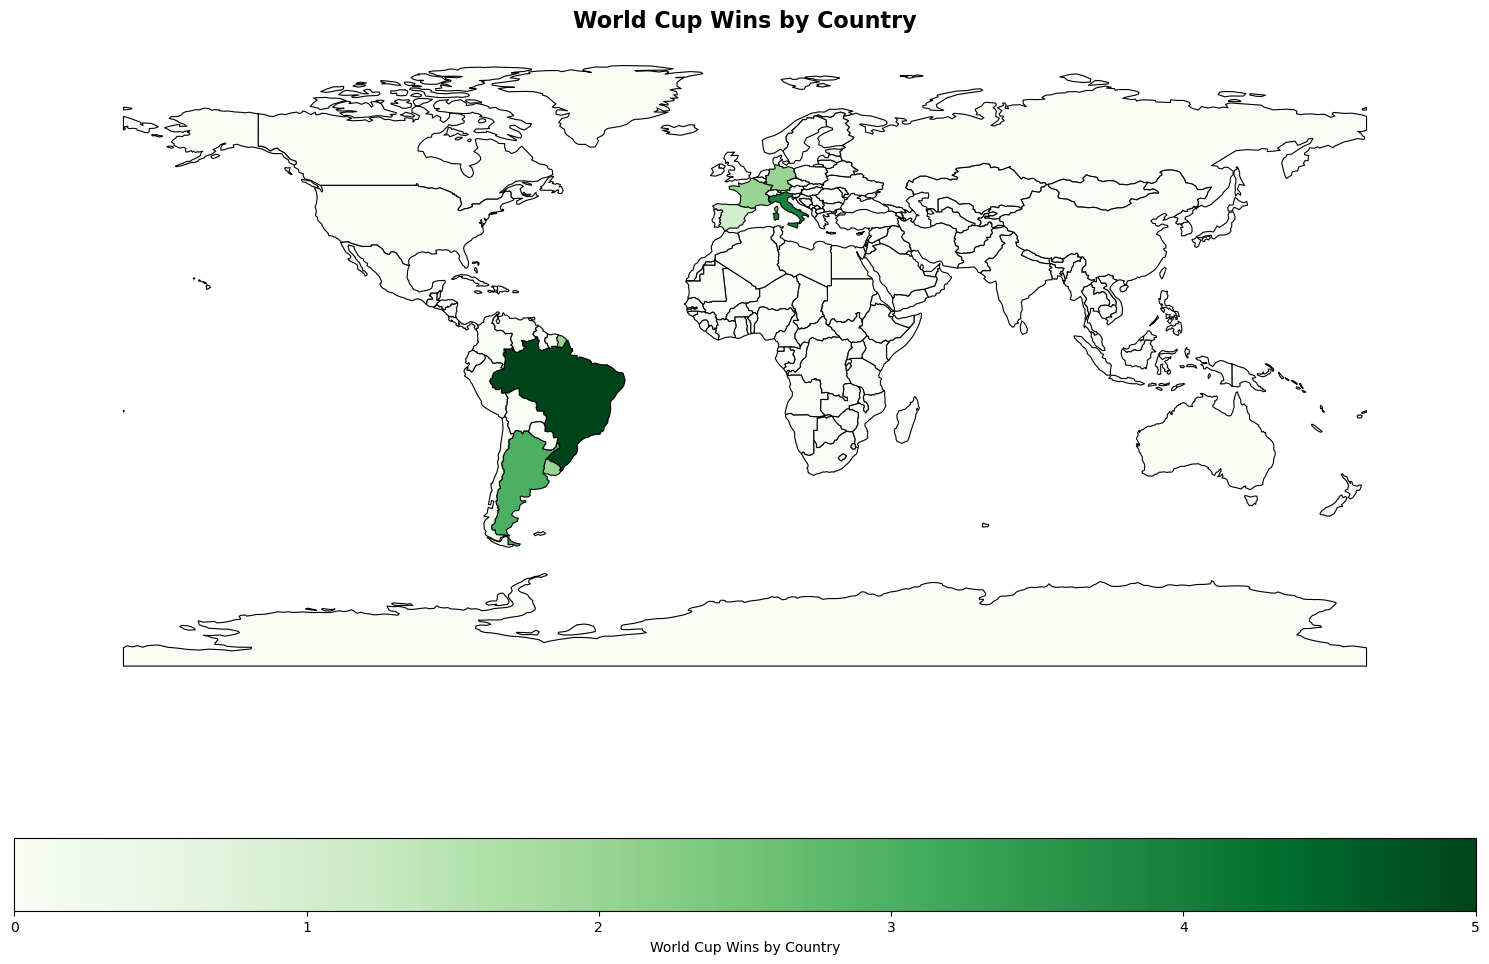

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(column='wins', ax=ax, legend=True,
            legend_kwds={'label': "World Cup Wins by Country",
                         'orientation': "horizontal"},
            cmap='Greens',
            edgecolor='black',
            linewidth=0.8)

# for idx, row in merged.iterrows():
#     if row['wins'] > 0:
#         ax.annotate(text=str(int(row['wins'])), 
#                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
#                     xytext=(3, 3), textcoords="offset points", ha='center', 
#                     fontsize=8, color='black', weight='bold')

ax.set_title('World Cup Wins by Country', fontsize=16, weight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()


# Distribution of Winners by Continent

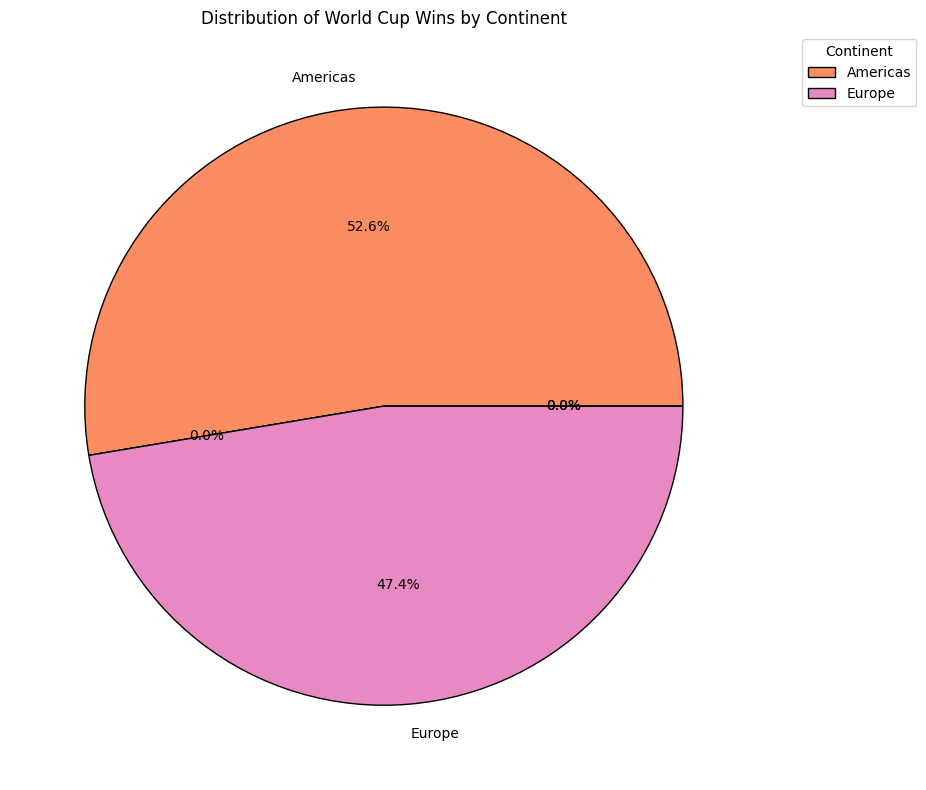

In [ ]:
continent_wins = df.groupby('continent')['world_cup_winner'].sum()
palette = sns.color_palette("Set2", len(continent_wins))

continent_wins.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=palette, labels=continent_wins.index, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of World Cup Wins by Continent')
plt.ylabel('')
plt.tight_layout()
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Top 5 Countries by Performance

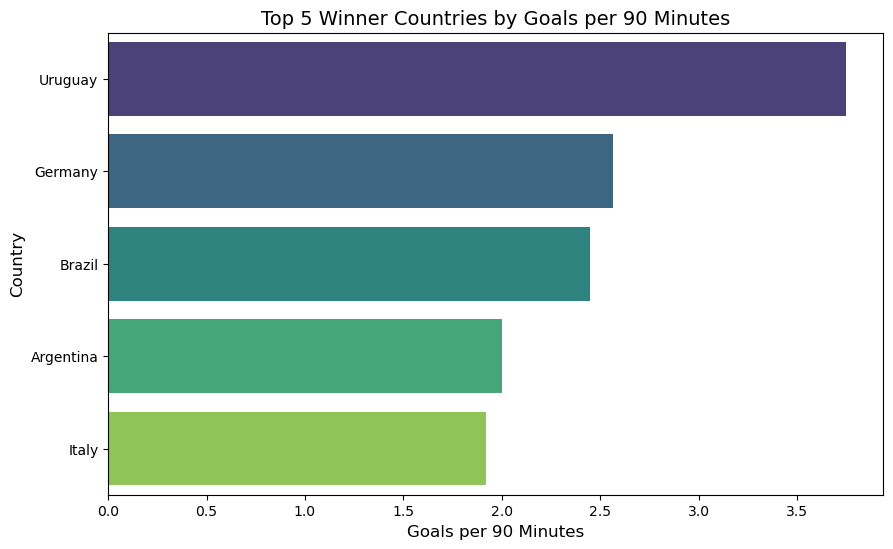

In [42]:
winner_countries = df[df['world_cup_winner'] == 1]

average_goals = winner_countries.groupby('team')['goals_per_90'].mean().reset_index()

top_5_goals = average_goals.sort_values(by='goals_per_90', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_goals, x='goals_per_90', y='team', palette='viridis')
plt.title('Top 5 Winner Countries by Goals per 90 Minutes', fontsize=14)
plt.xlabel('Goals per 90 Minutes', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Total Players Used by Country 

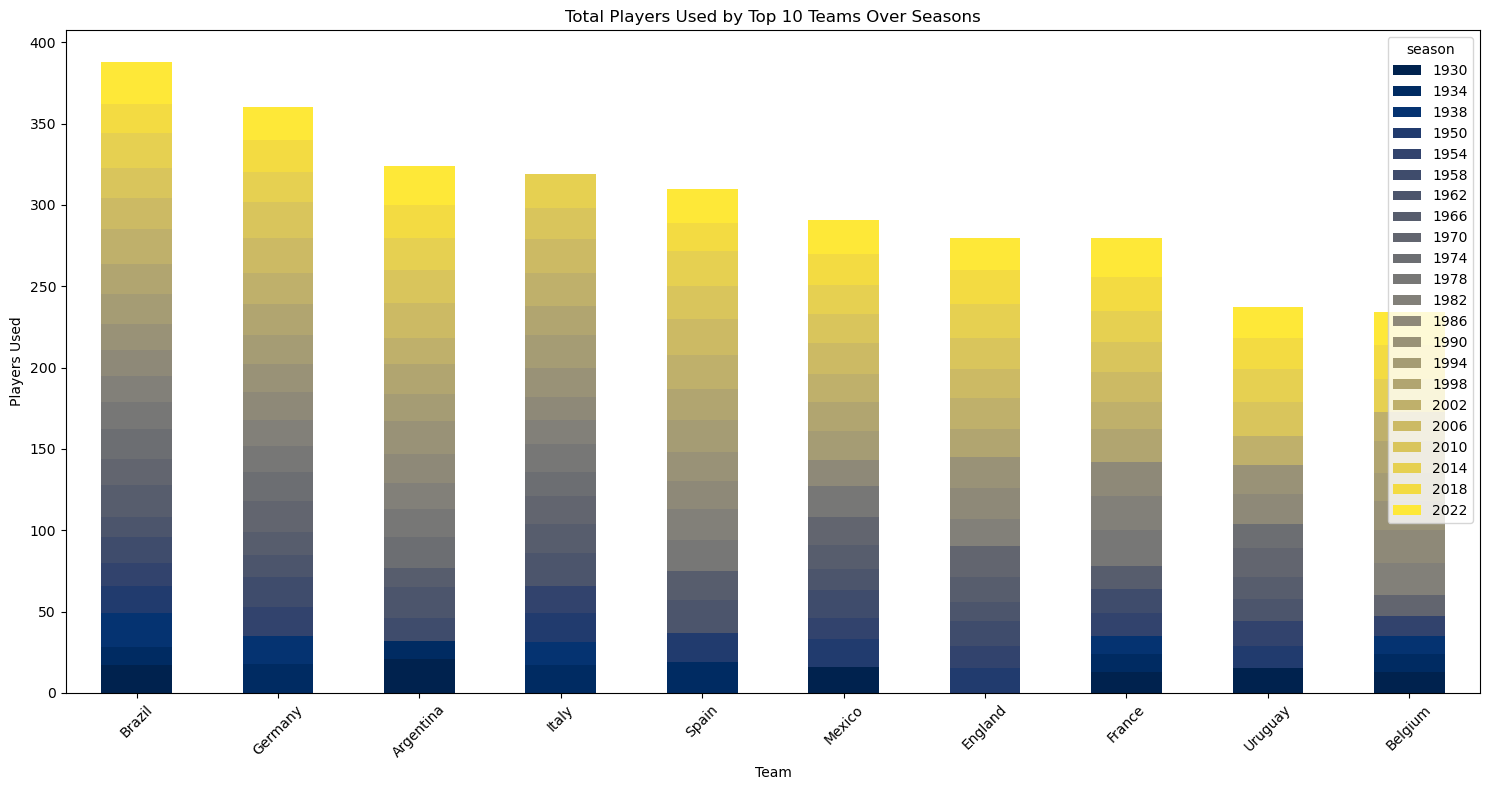

In [44]:
total_players_used = df.groupby('team')['players_used'].sum()

top_10_teams = total_players_used.nlargest(10).index

players_used_by_team = df.pivot_table(index='team', columns='season', values='players_used', aggfunc='sum')
players_used_by_team_top10 = players_used_by_team.loc[top_10_teams]

players_used_by_team_top10.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='cividis')
plt.title('Total Players Used by Top 10 Teams Over Seasons')
plt.xlabel('Team')
plt.ylabel('Players Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()